<a href="https://colab.research.google.com/github/Adlin17/Python_task/blob/main/Time_Series_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows with Date column:
            PassengerId  Survived  Pclass  \
Date                                        
2024-01-01          892         0       3   
2024-01-02          893         1       3   
2024-01-03          894         0       2   
2024-01-04          895         0       3   
2024-01-05          896         1       3   

                                                    Name     Sex   Age  SibSp  \
Date                                                                            
2024-01-01                              Kelly, Mr. James    male  34.5      0   
2024-01-02              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2024-01-03                     Myles, Mr. Thomas Francis    male  62.0      0   
2024-01-04                              Wirz, Mr. Albert    male  27.0      0   
2024-01-05  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

            Parch   Ticket     Fare Cabin Embarked  
Date                          

<ipython-input-7-c949f414300f>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = numeric_columns.resample('M').mean()  # Resample based on the mock Date


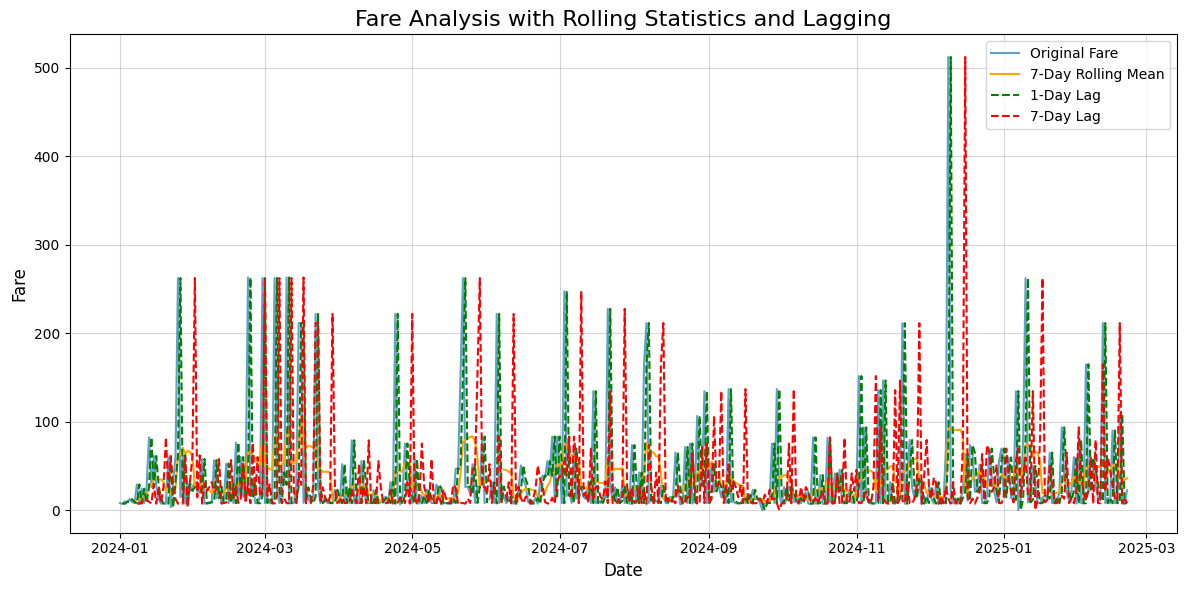

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset
file_path = '/content/tested.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Add a mock Date column for time-series analysis
data['Date'] = pd.date_range(start='2024-01-01', periods=len(data), freq='D')

# Set Date as the index
data.set_index('Date', inplace=True)

# Inspect dataset
print("First few rows with Date column:")
print(data.head())

# Select only numeric columns for resampling and lagging
numeric_columns = data.select_dtypes(include=[np.number])

# Resample Data (e.g., Monthly)
monthly_data = numeric_columns.resample('M').mean()  # Resample based on the mock Date
print("\nMonthly Resampled Data:")
print(monthly_data.head())

# Calculate Rolling Statistics for Fare
data['Rolling_Fare'] = data['Fare'].rolling(window=7).mean()  # 7-day rolling mean

# Create lagged features for Fare
data['Lag_1'] = data['Fare'].shift(1)  # 1-day lag
data['Lag_7'] = data['Fare'].shift(7)  # 7-day lag

# Inspect data with lagged features
print("\nData with lagged features:")
print(data[['Fare', 'Lag_1', 'Lag_7']].head())

# Plot Data
plt.figure(figsize=(12, 6))

# Plot original Fare data
plt.plot(data.index, data['Fare'], label='Original Fare', alpha=0.7)

# Plot rolling mean of Fare
plt.plot(data.index, data['Rolling_Fare'], label='7-Day Rolling Mean', color='orange')

# Plot lagged Fare (for 1-day and 7-day lags)
plt.plot(data.index, data['Lag_1'], label='1-Day Lag', linestyle='--', color='green')
plt.plot(data.index, data['Lag_7'], label='7-Day Lag', linestyle='--', color='red')

# Add legend and labels
plt.title('Fare Analysis with Rolling Statistics and Lagging', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()
